In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

 Goal:build a model that predicts conversion rate and, based on the model, come up with ideas to improve it.



In [2]:
import pandas as pd

pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 350)

#read from google drive
data=pd.read_csv("https://drive.google.com/uc?export=download&id=1LU5be_H1TD2Pp1OmI202to3YyKo9AzFY")

print(data.head())


  country  age  new_user source  total_pages_visited  converted
0      UK   25         1    Ads                    1          0
1      US   23         1    Seo                    5          0
2      US   28         1    Seo                    4          0
3   China   39         1    Seo                    5          0
4      US   30         1    Seo                    6          0


Data inspectation

In [3]:
print(data.describe())
print(data.groupby(['country']).size())
print(data.groupby(['source']).size())


                 age       new_user  total_pages_visited      converted
count  316200.000000  316200.000000        316200.000000  316200.000000
mean       30.569858       0.685465             4.872966       0.032258
std         8.271802       0.464331             3.341104       0.176685
min        17.000000       0.000000             1.000000       0.000000
25%        24.000000       0.000000             2.000000       0.000000
50%        30.000000       1.000000             4.000000       0.000000
75%        36.000000       1.000000             7.000000       0.000000
max       123.000000       1.000000            29.000000       1.000000
country
China       76602
Germany     13056
UK          48450
US         178092
dtype: int64
source
Ads        88740
Direct     72420
Seo       155040
dtype: int64


first sight observations:

This site is a US site

Users are pretty young

It makes sense that conversion rate at around 3% which is industry standard

Max age is 123 which is not normal

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB
None


Every column is completely filled

In [5]:
print(sorted(data['age'].unique(), reverse=True))

[123, 111, 79, 77, 73, 72, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17]


age 123 and 111 should be removed from our data

In [6]:
data = data[data.age<111]
print(sorted(data['age'].unique(), reverse=True))
print(data.info())

[79, 77, 73, 72, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 316198 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316198 non-null  object
 1   age                  316198 non-null  int64 
 2   new_user             316198 non-null  int64 
 3   source               316198 non-null  object
 4   total_pages_visited  316198 non-null  int64 
 5   converted            316198 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 16.9+ MB
None


Display the relationship between each feature and converting classes

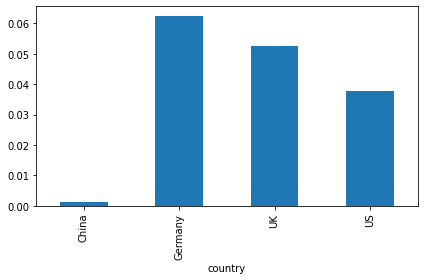

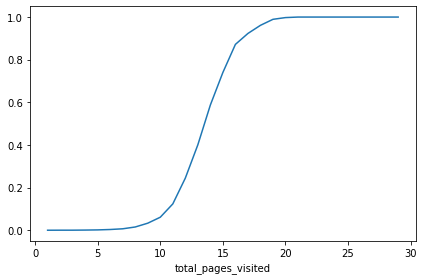

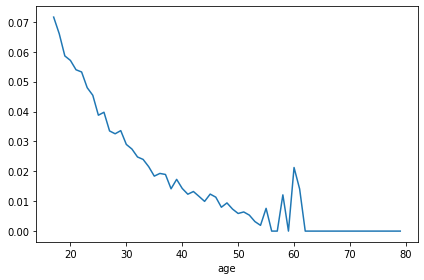

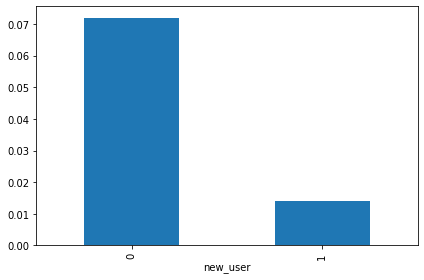

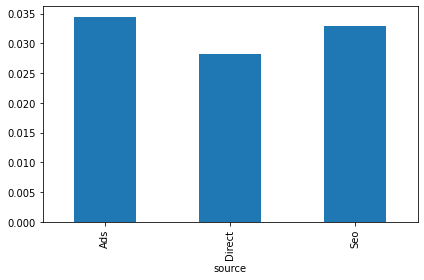

In [7]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
  
data.groupby(['country'])['converted'].mean().plot.bar()
plt.show()

data.groupby(['total_pages_visited'])['converted'].mean().plot()
plt.show()

data.groupby(['age'])['converted'].mean().plot()
plt.show()

data.groupby(['new_user'])['converted'].mean().plot.bar()
plt.show()

data.groupby(['source'])['converted'].mean().plot.bar()
plt.show()

**Model Building**

1. Logistic regression

2. decision tree

3. random forest

create dummy variables and prepair training set and testing set

In [8]:

data_dummy = pd.get_dummies(data, drop_first=True)
data_dummy.head()

,age,new_user,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,0,1,0,0,0
1,23,1,5,0,0,0,1,0,1
2,28,1,4,0,0,0,1,0,1
3,39,1,5,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,1


In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_dummy, test_size = 0.3)

X_train = train.drop('converted', axis=1)
Y_train = train['converted']
X_test = test.drop('converted', axis=1)
Y_test = test['converted']

In [10]:
# logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
print(logreg.score(X_train, Y_train))
          

0.9862066161255636


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [11]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
Y_predict = tree.predict(X_test)
print(tree.score(X_train, Y_train))

0.9885378922733556


In [12]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_predict = rf.predict(X_test)
print(rf.score(X_train, Y_train))

0.9885378922733556


We will use random forest to prevent overfitting

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
np.random.seed(999)
rf = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True)
rf.fit(X_train, Y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


RandomForestClassifier(max_features=3, oob_score=True)

In [14]:
#let's print OOB accuracy and confusion matrix
print(
"OOB accuracy is", 
rf.oob_score_, 
"\n", 
"OOB Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(Y_train, rf.oob_decision_function_[:,1].round(), labels=[0, 1]))
)

OOB accuracy is 0.984327137680832 
 OOB Confusion Matrix 
         0     1
0  213032  1164
1    2305  4837


In [15]:
#and let's print test accuracy and confusion matrix
print(
"Test accuracy is", rf.score(X_test,Y_test), 
"\n", 
"Test Set Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(Y_test, rf.predict(X_test), labels=[0, 1]))
)

Test accuracy is 0.9845456462154755 
 Test Set Confusion Matrix 
        0     1
0  91330   474
1    992  2064


Our model predicts well, so we can find more insights by checking feature importance

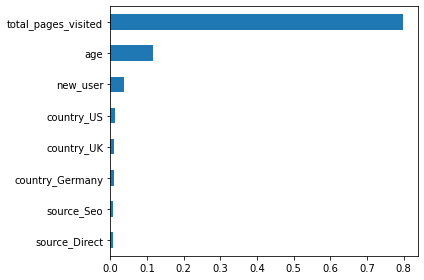

In [16]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances.sort_values().plot(kind='barh')
plt.show()

Here, we see total_pages_visited is the most important feature but it is probably ths least. Because people visit many pages to buy or make payments. So let's rebuild our random forest without total_pages_visited.

In [17]:
X_train = train.drop(['converted', 'total_pages_visited'], axis=1)
Y_train = train.converted
X_test = test.drop(['converted', 'total_pages_visited'], axis=1)
rf = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True)
rf.fit(X_train, Y_train)
#let's print OOB accuracy and confusion matrix
print(
"OOB accuracy is", 
rf.oob_score_, 
"\n", 
"OOB Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(Y_train, rf.oob_decision_function_[:,1].round(), labels=[0, 1]))
)
#and let's print test accuracy and confusion matrix
print(
"Test accuracy is", rf.score(X_test,Y_test), 
"\n", 
"Test Set Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(Y_test, rf.predict(X_test), labels=[0, 1]))
)
                            

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


OOB accuracy is 0.967705500185237 
 OOB Confusion Matrix 
         0  1
0  214190  6
1    7142  0
Test accuracy is 0.9677841028884672 
 Test Set Confusion Matrix 
        0  1
0  91804  0
1   3056  0


The test accuracy went down but it still predicts well.

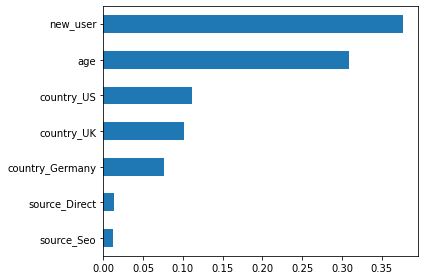

In [18]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances.sort_values().plot(kind='barh')
plt.show()

Now new_user becomes the most important feature!

Conclusion:

This site works for young age groups and feature age is the second important feature.

The conversion rate for German users is higher but with less number of user. Maybe focus on German market as a big oppotinity with huge benefit.

The conversion rate for Chinese user is super low even with 76602 as around 7 times number of users in German. Maybe check website translation problem or check if there is potential culture issue.   

New users' conversion rate is much lower than pre-signed users. Maybe offer some incentives to new users.


